In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Q1Data.csv')

Depth 1: Test Accuracy = 69.15%
Depth 2: Test Accuracy = 77.47%
Depth 3: Test Accuracy = 82.26%
Depth 4: Test Accuracy = 83.76%
Depth 5: Test Accuracy = 85.81%
Depth 6: Test Accuracy = 87.34%
Depth 7: Test Accuracy = 88.10%
Depth 8: Test Accuracy = 87.43%
Depth 9: Test Accuracy = 87.26%
Depth 10: Test Accuracy = 87.27%
Depth 11: Test Accuracy = 87.21%
Depth 12: Test Accuracy = 87.01%
Depth 13: Test Accuracy = 86.89%
Depth 14: Test Accuracy = 86.87%
Depth 15: Test Accuracy = 86.87%


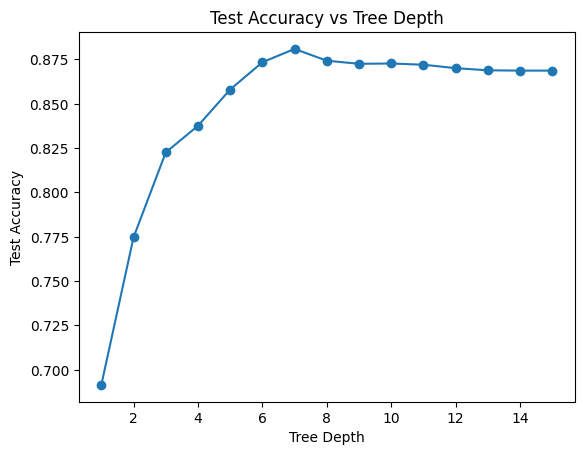

Observations:
1. As the depth of the decision tree increases, the test accuracy generally improves.
2. There is a diminishing rate of improvement in accuracy after Depth 6-7, suggesting diminishing returns with increasing tree depth.
3. Highest test accuracy is achieved at Depth 7.
4. The test accuracy remains relatively stable from Depth 7 to Depth 15, indicating a consistent performance within this range.


In [12]:
# Mapping string labels to integers
class_mapping = {label: idx for idx, label in enumerate(df['Genus'].unique())}
df['Genus'] = df['Genus'].map(class_mapping)

# Extracting features and target variable
X = df[['MFCCs_ 1', 'MFCCs_ 2', 'MFCCs_ 3', 'MFCCs_ 4', 'MFCCs_ 5', 'MFCCs_ 6']]
y = df['Genus']

# Splitting the dataset into train and test (80-20 ratio)
np.random.seed(42)
mask = np.random.rand(len(df)) < 0.2
X_train, X_test = X[mask], X[~mask]
y_train, y_test = y[mask], y[~mask]

#Decision Tree Node Class
class TreeNode:
    def __init__(self, predicted_class):
        self.predicted_class = predicted_class
        self.feature_index = 0
        self.threshold = 0
        self.left = None
        self.right = None

#Decision Tree Classifier Class
class DecisionTreeClassifier:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth

    def fit(self, X, y):
        self.n_classes_ = len(np.unique(y))
        self.n_features_ = X.shape[1]
        self.tree_ = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        num_samples_per_class = [np.sum(y == i) for i in range(self.n_classes_)]
        predicted_class = np.argmax(num_samples_per_class)
        node = TreeNode(predicted_class=predicted_class)

        if depth < self.max_depth:
            idx, thr = self._best_split(X, y)
            if idx is not None:
                indices_left = X[:, idx] < thr
                X_left, y_left = X[indices_left], y[indices_left]
                X_right, y_right = X[~indices_left], y[~indices_left]
                node.feature_index = idx
                node.threshold = thr
                node.left = self._grow_tree(X_left, y_left, depth + 1)
                node.right = self._grow_tree(X_right, y_right, depth + 1)
        return node

    def _best_split(self, X, y):
        m, n = X.shape
        if m <= 1:
            return None, None

        num_parent = [np.sum(y == c) for c in range(self.n_classes_)]

        best_gini = 1.0 - sum((num / m) ** 2 for num in num_parent)
        best_idx, best_thr = None, None

        for idx in range(self.n_features_):
            thresholds, classes = zip(*sorted(zip(X[:, idx], y)))
            num_left = [0] * self.n_classes_
            num_right = num_parent.copy()
            for i in range(1, m):
                c = classes[i - 1]
                num_left[c] += 1
                num_right[c] -= 1
                gini_left = 1.0 - sum(
                    (num_left[x] / i) ** 2 for x in range(self.n_classes_)
                )
                gini_right = 1.0 - sum(
                    (num_right[x] / (m - i)) ** 2 for x in range(self.n_classes_)
                )
                gini = (i * gini_left + (m - i) * gini_right) / m
                if thresholds[i] == thresholds[i - 1]:
                    continue
                if gini < best_gini:
                    best_gini = gini
                    best_idx = idx
                    best_thr = (thresholds[i] + thresholds[i - 1]) / 2

        return best_idx, best_thr

    def predict(self, X):
        return [self._predict(inputs) for inputs in X]

    def _predict(self, inputs):
        node = self.tree_
        while node.left:
            if inputs[node.feature_index] < node.threshold:
                node = node.left
            else:
                node = node.right
        return node.predicted_class

# Training the Decision Tree Classifier
max_depths = range(1, 16)
decisionTreeAccuracies = []

for max_depth in max_depths:
    clf = DecisionTreeClassifier(max_depth=max_depth)
    clf.fit(X_train.values, y_train.values)

    # Making predictions on the test set
    y_pred = clf.predict(X_test.values)

    # Calculating and storing the test accuracy
    accuracy = np.mean(y_pred == y_test.values)
    decisionTreeAccuracies.append(accuracy)

# Outputing test accuracies and observations
for depth, accuracy in zip(max_depths, decisionTreeAccuracies):
    print(f"Depth {depth}: Test Accuracy = {accuracy * 100:.2f}%")
    
# Plotting the results
plt.plot(max_depths, decisionTreeAccuracies, marker='o')
plt.title('Test Accuracy vs Tree Depth')
plt.xlabel('Tree Depth')
plt.ylabel('Test Accuracy')
plt.show()
          
print("Observations:")
print("1. As the depth of the decision tree increases, the test accuracy generally improves.")
print("2. There is a diminishing rate of improvement in accuracy after Depth 6-7, suggesting diminishing returns with increasing tree depth.")
print("3. Highest test accuracy is achieved at Depth 7.")
print("4. The test accuracy remains relatively stable from Depth 7 to Depth 15, indicating a consistent performance within this range.")




k = 1: Test Accuracy = 0.9861
k = 2: Test Accuracy = 0.9861
k = 3: Test Accuracy = 0.9805
k = 4: Test Accuracy = 0.9847
k = 5: Test Accuracy = 0.9750
k = 6: Test Accuracy = 0.9750
k = 7: Test Accuracy = 0.9722
k = 8: Test Accuracy = 0.9736
k = 9: Test Accuracy = 0.9722
k = 10: Test Accuracy = 0.9708
k = 11: Test Accuracy = 0.9722
k = 12: Test Accuracy = 0.9666
k = 13: Test Accuracy = 0.9638
k = 14: Test Accuracy = 0.9638
k = 15: Test Accuracy = 0.9624
k = 16: Test Accuracy = 0.9624
k = 17: Test Accuracy = 0.9611
k = 18: Test Accuracy = 0.9597
k = 19: Test Accuracy = 0.9583
k = 20: Test Accuracy = 0.9583
k = 21: Test Accuracy = 0.9583
k = 22: Test Accuracy = 0.9569
k = 23: Test Accuracy = 0.9541
k = 24: Test Accuracy = 0.9569
k = 25: Test Accuracy = 0.9513
k = 26: Test Accuracy = 0.9541
k = 27: Test Accuracy = 0.9513
k = 28: Test Accuracy = 0.9499
k = 29: Test Accuracy = 0.9485
k = 30: Test Accuracy = 0.9471
k = 31: Test Accuracy = 0.9458
k = 32: Test Accuracy = 0.9458
k = 33: Test Accu

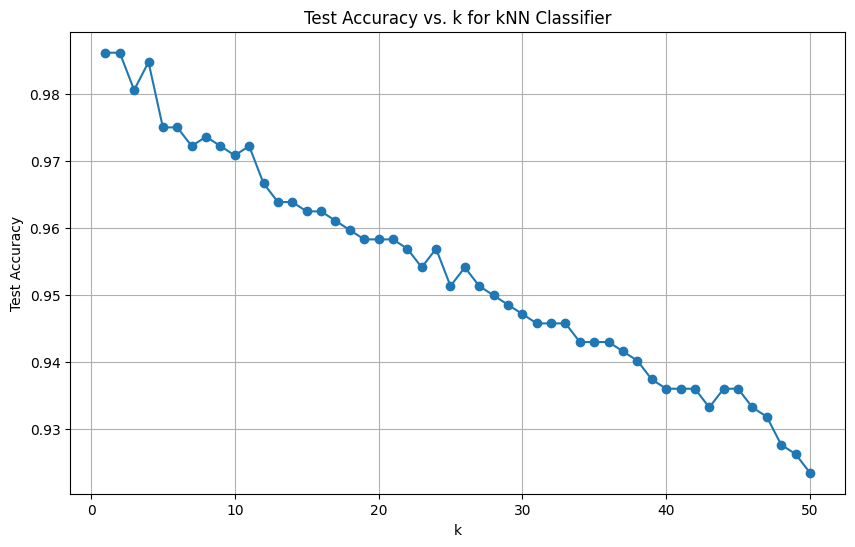

Observations:
1. The test accuracy decreases as k increases.
2. Max test accuracy is achieved at k = 2.
3. Hyperparameter tuning and data preprocessing can further enhance model performance


In [13]:

# Function to calculate Euclidean distance between two data points
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# KNN classifier function
def kNN_classifier(train_data, test_data, train_labels, k):
    predictions = []

    for test_point in test_data:
        distances = [euclidean_distance(test_point, train_point) for train_point in train_data]
        nearest_neighbors_indices = np.argsort(distances)[:k]
        nearest_neighbors_labels = [train_labels[i] for i in nearest_neighbors_indices]

        # Find the most common label among the k-nearest neighbors
        predicted_genus = max(set(nearest_neighbors_labels), key=nearest_neighbors_labels.count)
        predictions.append(predicted_genus)

    return predictions

# Spliting the dataset into training (30%) and test (10%) sets
train_split = 0.3
test_split = 0.1

# Shuffling the data
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Determining the split sizes
train_size = int(train_split * len(df))
test_size = int(test_split * len(df))

# Splitting the data into training and test sets
train_data = df.iloc[:train_size, 1:-3].to_numpy()  # Exclude Family, Genus, Species columns
train_labels = df.iloc[:train_size, -3].to_numpy()
test_data = df.iloc[train_size:train_size + test_size, 1:-3].to_numpy()
test_labels = df.iloc[train_size:train_size + test_size, -3].to_numpy()

# Calculating test accuracy for k ranging from 1 to 50
k_values = range(1, 51)
knnAccuracies = []

for k in k_values:
    predictions = kNN_classifier(train_data, test_data, train_labels, k)
    correct_predictions = sum(predictions[i] == test_labels[i] for i in range(len(test_labels)))
    accuracy = correct_predictions / len(test_labels)
    knnAccuracies.append(accuracy)

# Printing all the test accuracies
for k, accuracy in zip(k_values, knnAccuracies):
    print(f"k = {k}: Test Accuracy = {accuracy:.4f}")

# Plotting the test accuracy for different values of k
plt.figure(figsize=(10, 6))
plt.plot(k_values, knnAccuracies, marker='o', linestyle='-')
plt.title("Test Accuracy vs. k for kNN Classifier")
plt.xlabel("k")
plt.ylabel("Test Accuracy")
plt.grid(True)
plt.show()

print("Observations:")
print("1. The test accuracy decreases as k increases.")
print("2. Max test accuracy is achieved at k = 2.")
print("3. Hyperparameter tuning and data preprocessing can further enhance model performance")



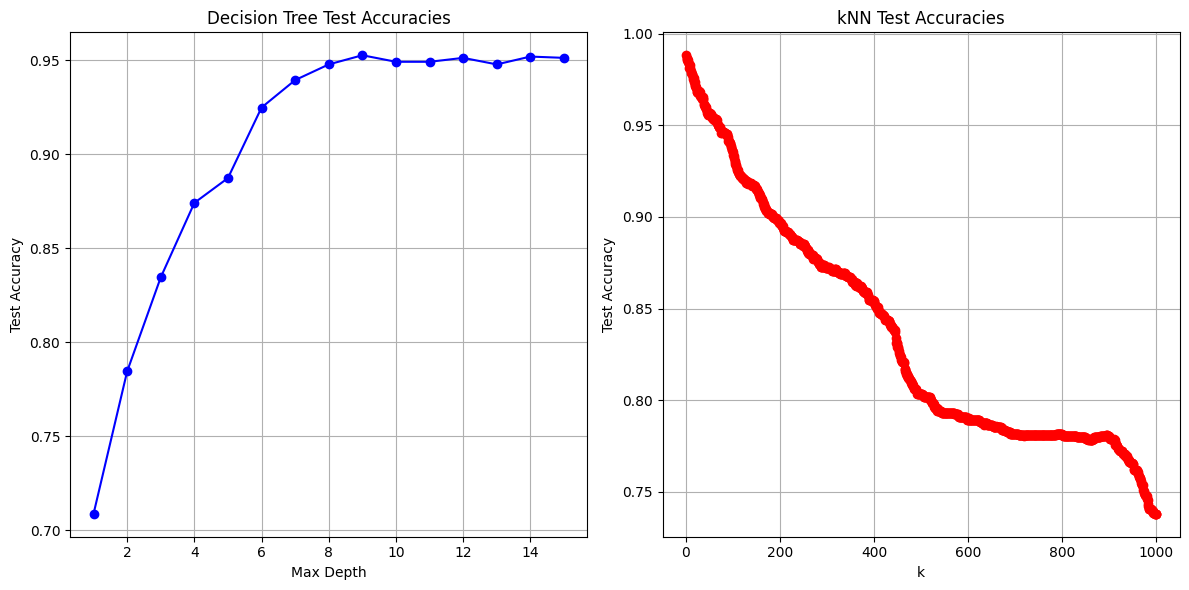

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Extract features (X) and target labels (y)
X = df.drop(columns=["Family", "Genus", "Species"])
y = df["Genus"]

# Initializing lists to store test accuracies
dt_test_accuracies = []
knn_test_accuracies = []

# Splitting the data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Trees: Vary depth from 1 to 15
for depth in range(1, 16):
    # Creating and training Decision Tree Classifier
    dt_classifier = DecisionTreeClassifier(max_depth=depth)
    dt_classifier.fit(X_train, y_train)
    
    # Evaluating on the test set
    dt_accuracy = dt_classifier.score(X_test, y_test)
    dt_test_accuracies.append(dt_accuracy)

# KNN: Vary k from 1 to 1000
for k in range(1, 1001):
    # Creating and training KNN Classifier
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)
    
    # Evaluating on the test set
    knn_accuracy = knn_classifier.score(X_test, y_test)
    knn_test_accuracies.append(knn_accuracy)

# Plotting the test accuracies for Decision Trees and KNN
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, 16), dt_test_accuracies, marker='o', linestyle='-', color='b')
plt.title('Decision Tree Test Accuracies')
plt.xlabel('Max Depth')
plt.ylabel('Test Accuracy')
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(range(1, 1001), knn_test_accuracies, marker='o', linestyle='-', color='r')
plt.title('kNN Test Accuracies')
plt.xlabel('k')
plt.ylabel('Test Accuracy')
plt.grid()

plt.tight_layout()
plt.show()





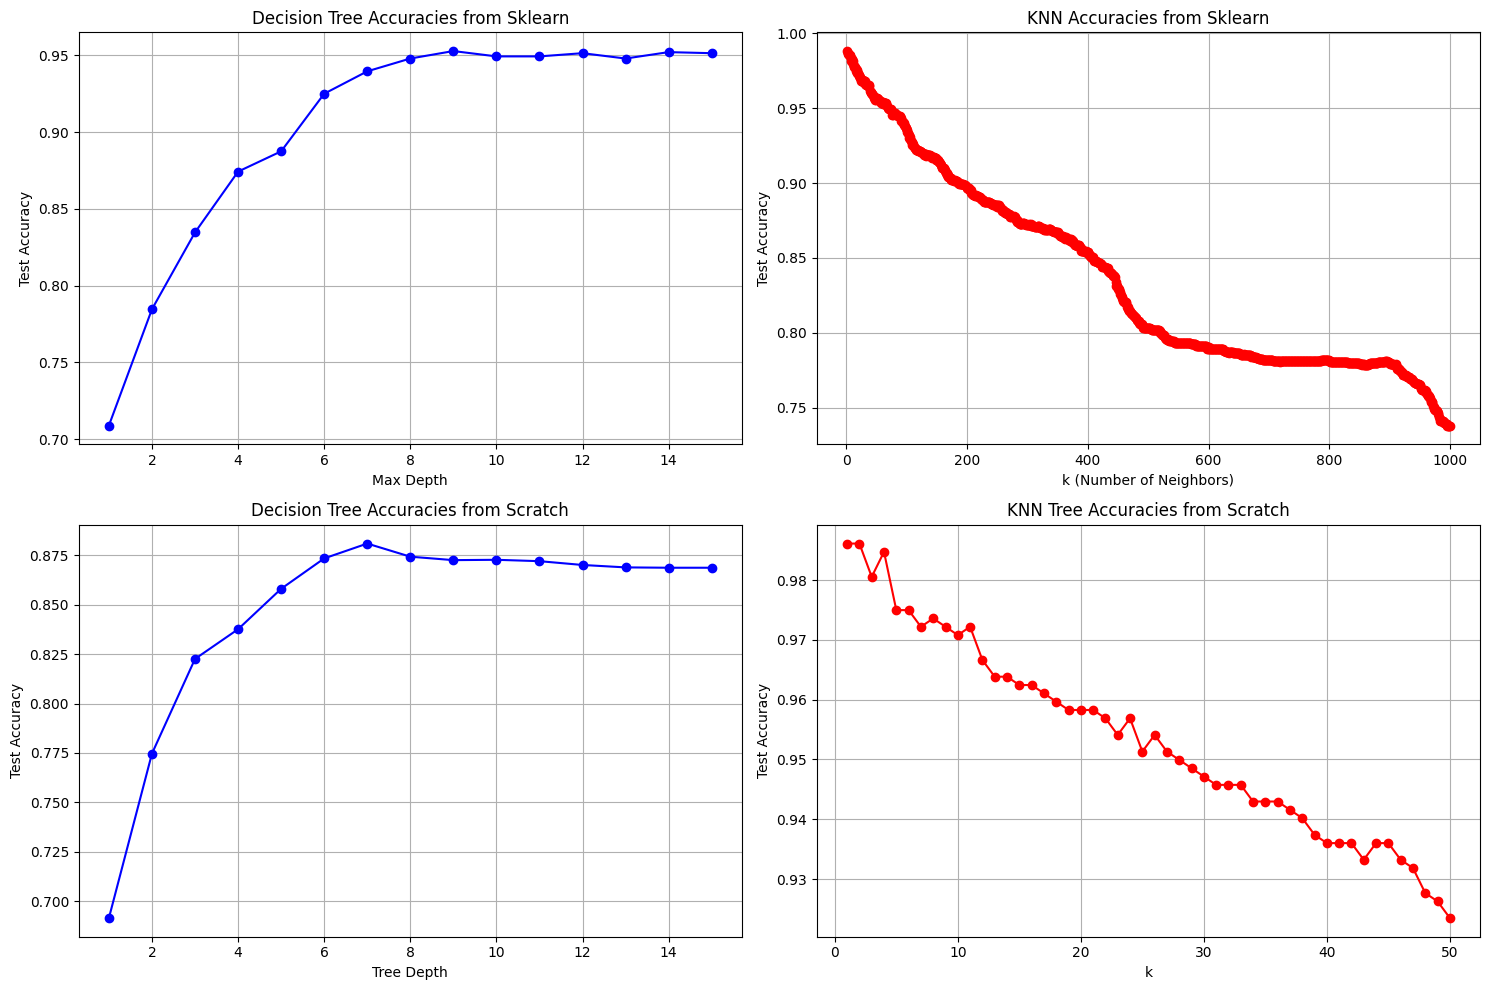

In [16]:
plt.figure(figsize=(15, 10))


plt.subplot(2, 2, 1)
plt.plot(range(1, 16), dt_test_accuracies, marker='o', linestyle='-', color='b')
plt.title('Decision Tree Accuracies from Sklearn')
plt.xlabel('Max Depth')
plt.ylabel('Test Accuracy')
plt.grid()


plt.subplot(2, 2, 2)
plt.plot(range(1, 1001), knn_test_accuracies, marker='o', linestyle='-', color='r')
plt.title('KNN Accuracies from Sklearn')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Test Accuracy')
plt.grid()


plt.subplot(2, 2, 3)
plt.plot(max_depths, decisionTreeAccuracies, marker='o', linestyle='-', color='b')
plt.title('Decision Tree Accuracies from Scratch')
plt.xlabel('Tree Depth')
plt.ylabel('Test Accuracy')
plt.grid()


plt.subplot(2, 2, 4)
plt.plot(k_values, knnAccuracies, marker='o', linestyle='-', color='r')
plt.title("KNN Tree Accuracies from Scratch")
plt.xlabel("k")
plt.ylabel("Test Accuracy")
plt.grid()

plt.tight_layout()
plt.show()